### Table of contents
# 6. Time Series Data
### 6.1 Import assets
### 6.2 Subsetting, wrangling, and cleaning time-series data
### 6.3 Time-series analysis: decomposition
### 6.4 Testing for stationarity
### 6.5 Stationarizing the data

# 6.1 Import assets

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

from datetime import datetime


In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Path to import datasets
path = r'C:\Users\raque\Documents\Achievement 6\Forbes billionaires 1997-2023 analysis'

In [4]:
# Import datasets
df_billio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_billionaires_1997_2023_clean.csv'), index_col = False)

In [5]:
df_billio.shape

(31731, 14)

In [6]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN


# 6.2. Subsetting, wrangling, and cleaning time-series data

In [7]:
df_billio.columns

Index(['year', 'rank', 'net_worth_billions', 'full_name', 'age', 'gender',
       'country_of_citizenship', 'country_of_residence', 'city_of_residence',
       'business_industries', 'organization_name', 'position_in_organization',
       'self_made', 'wealth_status'],
      dtype='object')

In [8]:
# Create a subset with the relevant data for the time-series analysis
df = df_billio[['year', 'net_worth_billions']]

In [9]:
df.shape

(31731, 2)

In [10]:
df.head()

,year,net_worth_billions
0,1997,2.0
1,1997,1.8
2,1998,3.3
3,1999,7.1
4,1999,2.9


In [11]:
# Sum of net worth per grouping by country of residence
df['total_net_worth'] = df.groupby('year')['net_worth_billions'].transform('sum')

In [12]:
df.head()

,year,net_worth_billions,total_net_worth
0,1997,2.0,3.8
1,1997,1.8,3.8
2,1998,3.3,3.3
3,1999,7.1,18.7
4,1999,2.9,18.7


In [13]:
df.drop(['net_worth_billions'], axis=1, inplace=True) # Drop the "year" column

In [14]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

31704

In [15]:
df = df.drop_duplicates()

In [16]:
df.head()

,year,total_net_worth
0,1997,3.8
2,1998,3.3
3,1999,18.7
11,2000,16.2
19,2001,1215.9


In [17]:
# Set the "year" column as the index
df['datetime'] = pd.to_datetime(df.year, format='%Y') # Create a datetime column from "year"
df = df.set_index('datetime') # Set the datetime as the index of the dataframe
df.drop(['year'], axis=1, inplace=True) # Drop the "year" column
df.head(100)

,total_net_worth
datetime,
1997-01-01,3.80
1998-01-01,3.30
1999-01-01,18.70
2000-01-01,16.20
2001-01-01,1215.90
2002-01-01,1113.50
2003-01-01,1028.40
2004-01-01,1472.70
2005-01-01,1817.60


The collection of the data is done once a year, because I only have one date per data point it made sense using the sum of all the year for the time-series. 

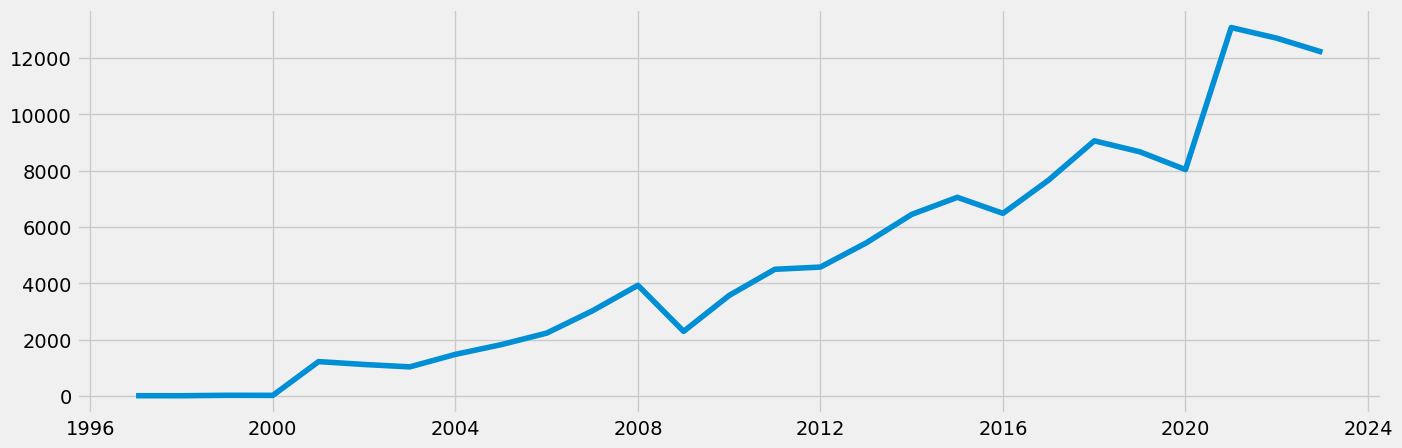

In [18]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

In [19]:
# Check for missing values (you shouldn't have any)
df.isnull().sum() 

total_net_worth    0
dtype: int64

# 6.3 Time-series analysis: decomposition

In [20]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [21]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

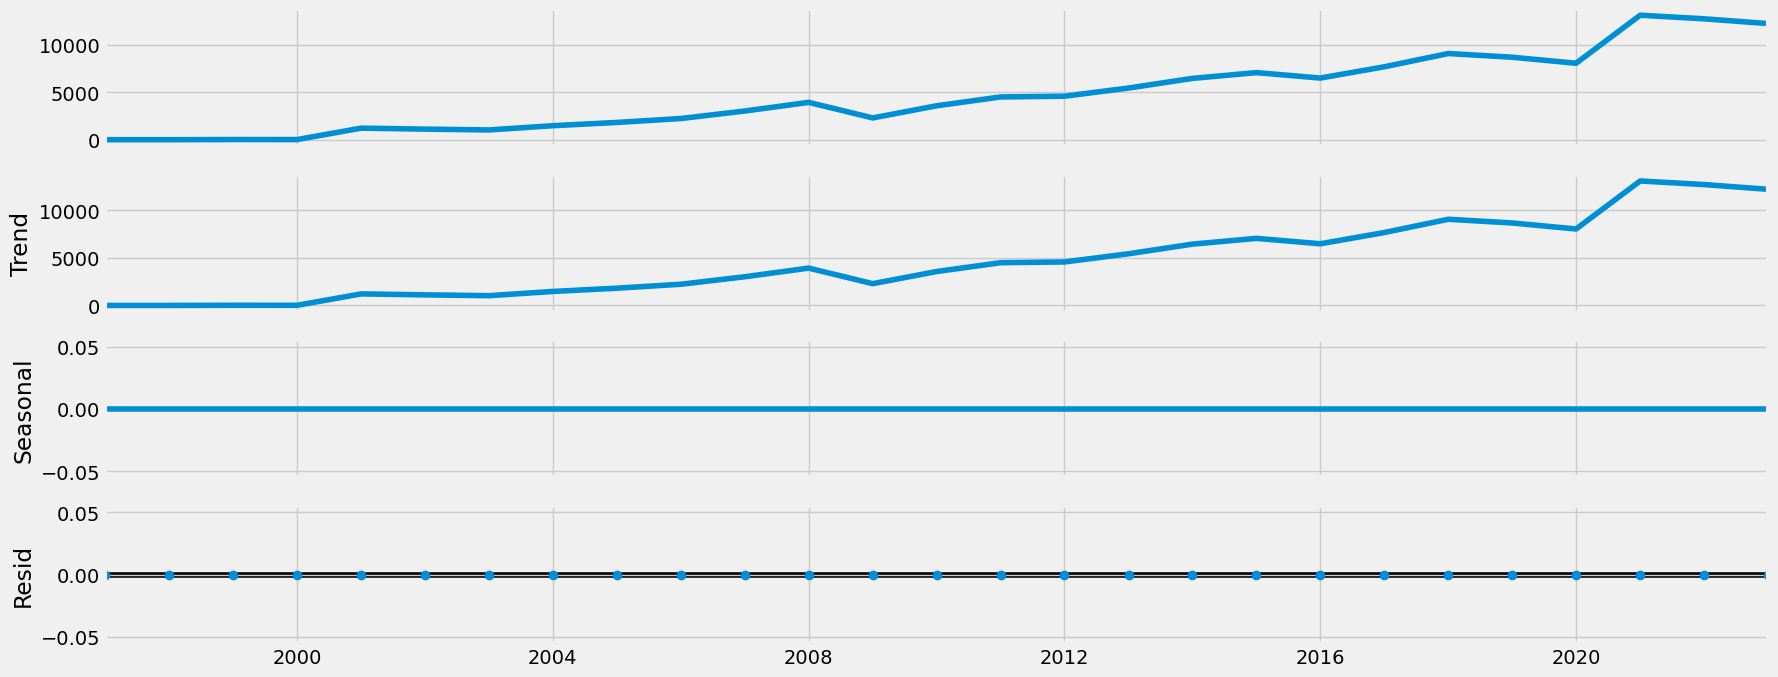

In [22]:
# Plot the separate components
decomposition.plot()
plt.show()

We can observe that there isn't any seasonality or residual noise, but we have a positive trend, which makes sense considering inflation. We actually see the impact of the 2008 economic crisis witha little drop in numbers. 

# 6.4 Testing for stationarity

In [24]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['total_net_worth'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.604110
p-value                         0.999076
Number of Lags Used             9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


- Null hypothesis: presence of a unit root (unpredictable noise)
- Alternative hipothesis: no unit root (no unpredictanle noise). 
The critical values are smaller than the test statistic, if we go with 5% that's -3.05 vs 2.6 in the test statistic. That's quite a big difference. For this reason we can't reject the null hypothesis. Which means that there is a unit root in the data therefore is non-stationary. 

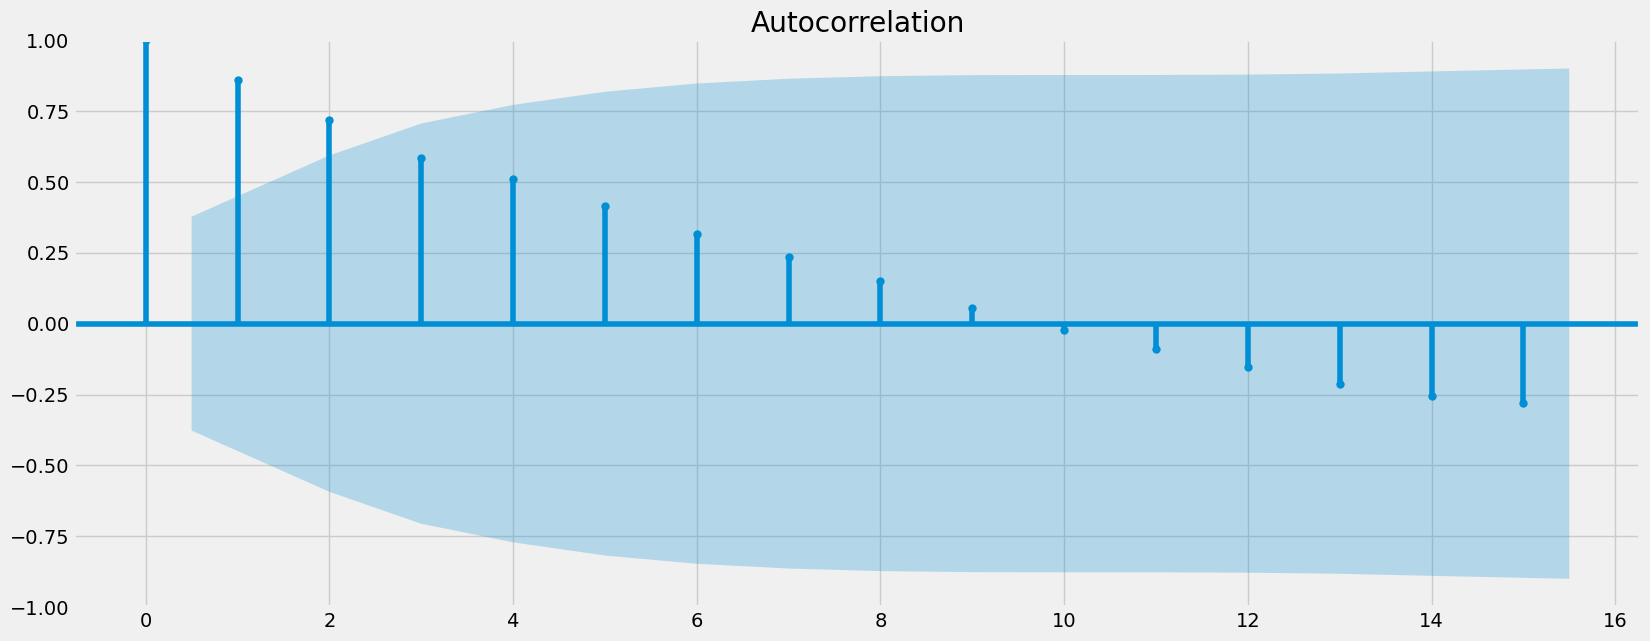

In [25]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

We can observe regular decreseases in each bar and when lines go above the blue edge of the confidence interval, it means you have lags that are significantly correlated with each other. This is another sign for non-stationary data. 

Since it's not possible to forecast non-stationary data, I'll have to make it stationary first. In order to do so, I'll be running through some steps to extract the trend from your data by removing any unnecessary variance.

# 6.5 Stationarizing the data

In [43]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.
data_diff.dropna(inplace = True) 

In [45]:
data_diff.head()

,total_net_worth
datetime,
1998-01-01,-0.5
1999-01-01,15.4
2000-01-01,-2.5
2001-01-01,1199.7
2002-01-01,-102.4


In [46]:
data_diff.columns

Index(['total_net_worth'], dtype='object')

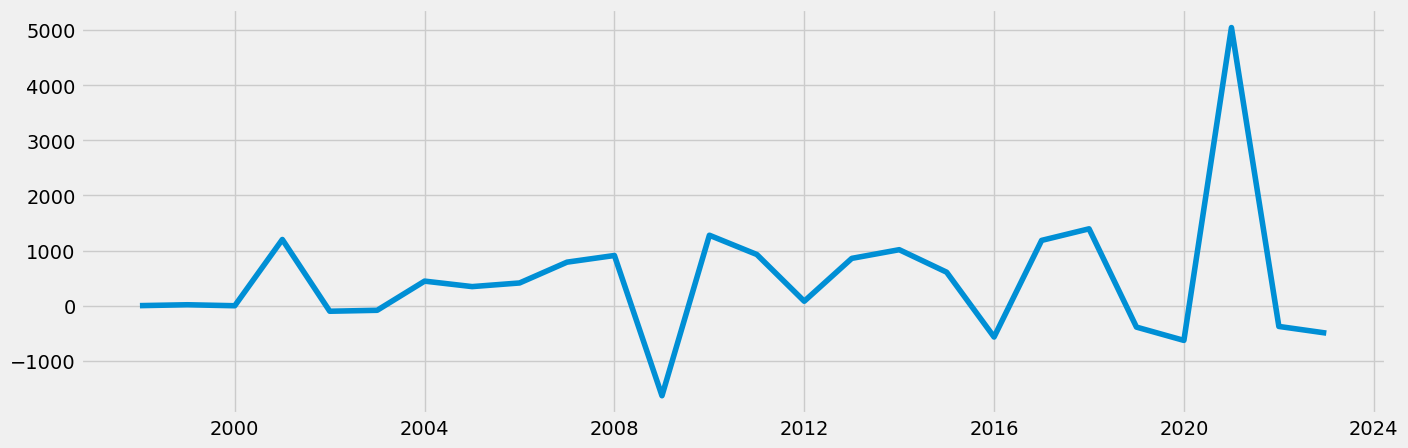

In [47]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.526886e+00
p-value                        1.009416e-08
Number of Lags Used            1.000000e+00
Number of Observations Used    2.400000e+01
Critical Value (1%)           -3.737709e+00
Critical Value (5%)           -2.992216e+00
Critical Value (10%)          -2.635747e+00
dtype: float64


The test statistic is now smaller than the critical values but the p values is bigger than 0.05. 

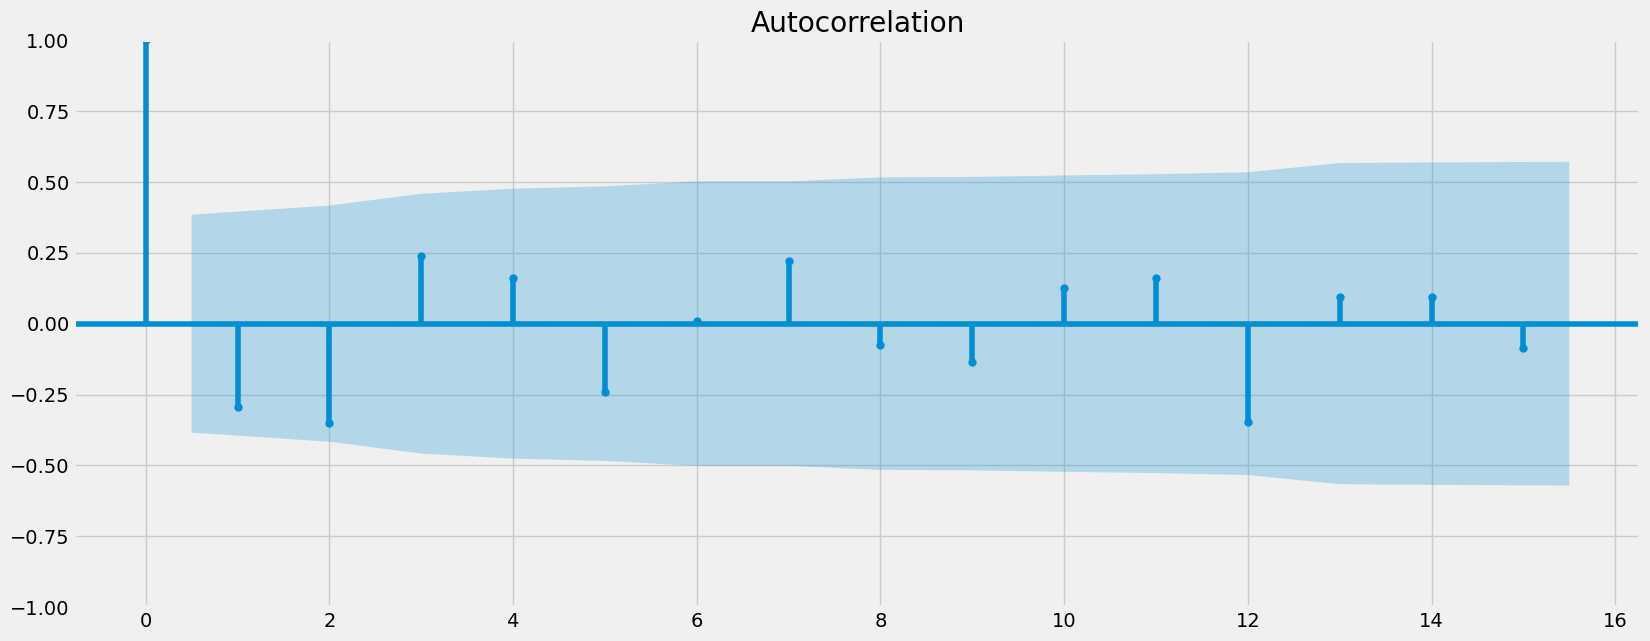

In [32]:
plot_acf(data_diff)
plt.show()

The autocorrelation has improved, but there's still a line outside the blue area. It looks like the stationarity is weak. For that reason I'm going to do another round of differencing.

In [48]:
data_diff2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [49]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.
data_diff2.dropna(inplace = True) 

In [51]:
data_diff2.head()

,total_net_worth
datetime,
1999-01-01,15.9
2000-01-01,-17.9
2001-01-01,1202.2
2002-01-01,-1302.1
2003-01-01,17.3


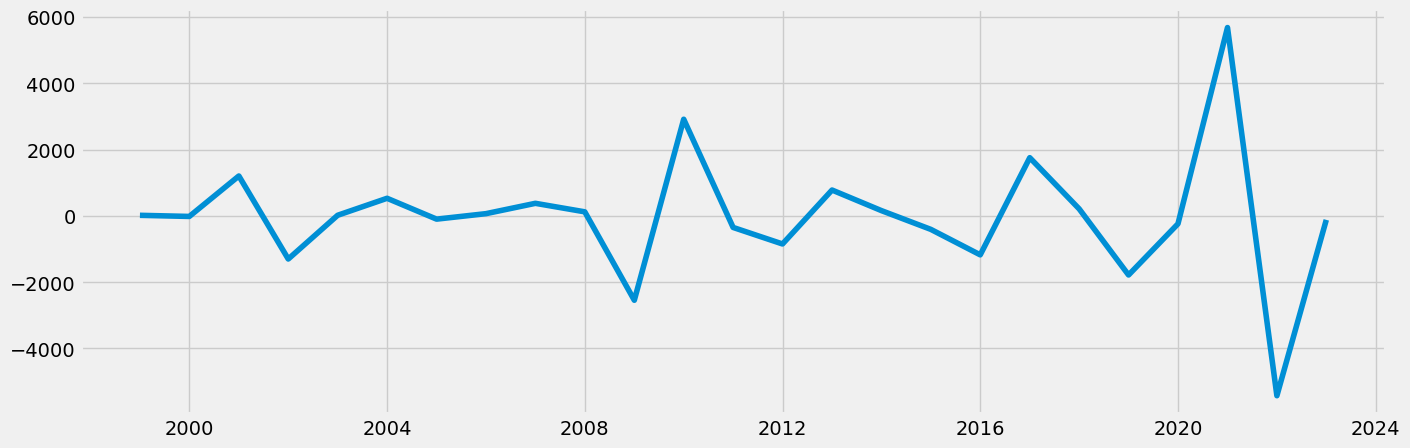

In [52]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [54]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.242502
p-value                         0.017653
Number of Lags Used             9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


The p-value is now of 0.01, way below 0.05. And the test statistic is slightly smaller than critical value 5%. Although the difference has been reduced on this round.

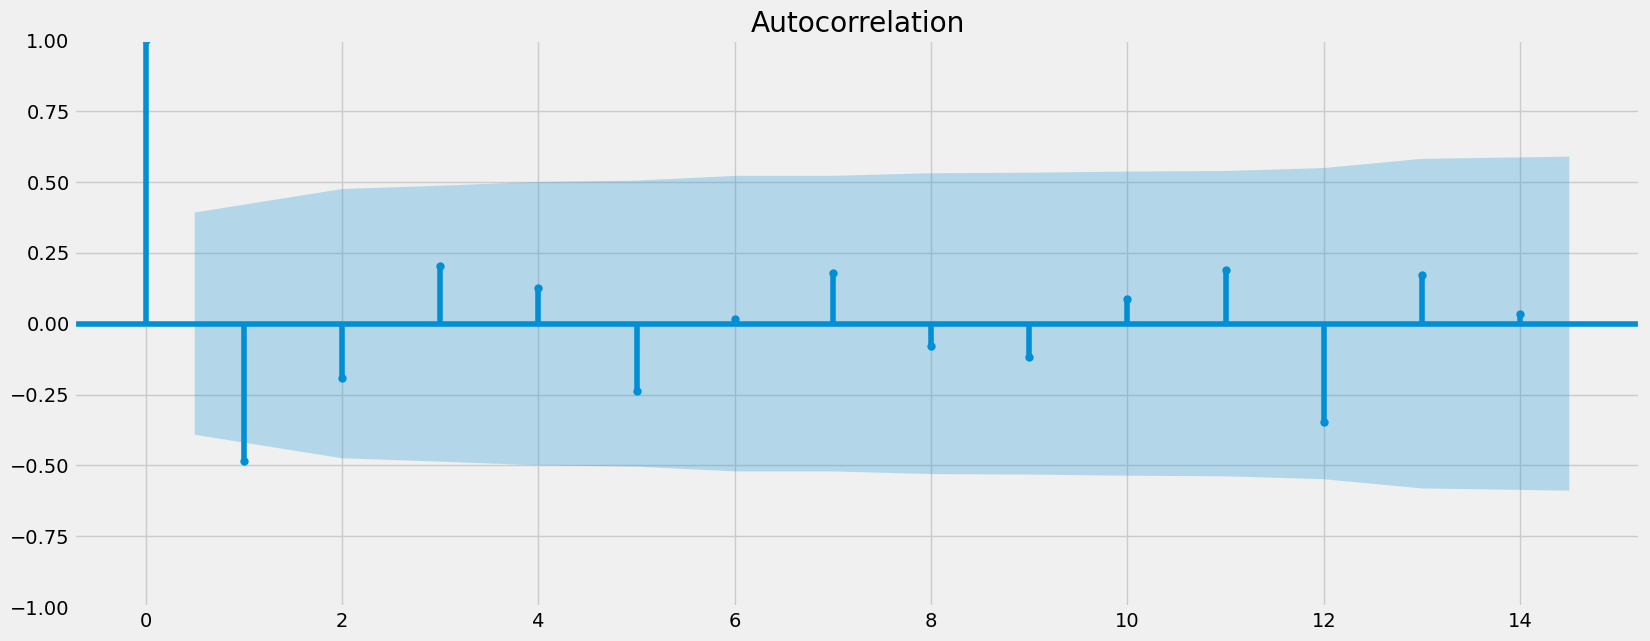

In [55]:
plot_acf(data_diff2)
plt.show()

This graph is pretty much the same as the last one, but we'll leave it here since the dickey fuller statistics were successful this time. 